In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('./data/dataset_creation/dataframes/v2/df_train.csv')

In [3]:
train_df

,new_class_id,xcn,ycn,wn,hn,img,img_w,img_h,class_name,bbox_area,bbox_size_category
0,1,0.713264,0.549830,0.059249,0.040532,33132,1624.0,1200.0,Car,4680.03960,Medium
1,1,0.217753,0.536722,0.069178,0.054257,33132,1624.0,1200.0,Car,7314.64800,Medium
2,1,0.138355,0.531935,0.067605,0.038299,33132,1624.0,1200.0,Car,5045.90230,Medium
3,4,0.503125,0.455294,0.865625,0.534118,111934,640.0,425.0,Aircraft,125758.08600,Large
4,0,0.119531,0.569792,0.020313,0.039583,102647,640.0,480.0,Person,246.99977,Tiny
...,...,...,...,...,...,...,...,...,...,...,...
740604,1,0.281250,0.518482,0.046875,0.025292,81579,640.0,514.0,Car,389.99957,Small
740605,1,0.169531,0.514591,0.023438,0.021401,81579,640.0,514.0,Car,165.00017,Tiny
740606,1,0.075781,0.509728,0.032813,0.027237,81579,640.0,514.0,Car,294.00050,Small
740607,1,0.025781,0.509728,0.051562,0.027237,81579,640.0,514.0,Car,462.00080,Small


# 1) Extract average object size

In [4]:
train_df['w'] = train_df['wn']*train_df['img_w']
train_df['h'] = train_df['hn']*train_df['img_h']
#train_df['ar'] = train_df['w']/(train_df['h']+1e-7)
train_df

,new_class_id,xcn,ycn,wn,hn,img,img_w,img_h,class_name,bbox_area,bbox_size_category,w,h
0,1,0.713264,0.549830,0.059249,0.040532,33132,1624.0,1200.0,Car,4680.03960,Medium,96.220376,48.638760
1,1,0.217753,0.536722,0.069178,0.054257,33132,1624.0,1200.0,Car,7314.64800,Medium,112.345072,65.108760
2,1,0.138355,0.531935,0.067605,0.038299,33132,1624.0,1200.0,Car,5045.90230,Medium,109.791007,45.959160
3,4,0.503125,0.455294,0.865625,0.534118,111934,640.0,425.0,Aircraft,125758.08600,Large,554.000000,227.000150
4,0,0.119531,0.569792,0.020313,0.039583,102647,640.0,480.0,Person,246.99977,Tiny,13.000000,18.999984
...,...,...,...,...,...,...,...,...,...,...,...,...,...
740604,1,0.281250,0.518482,0.046875,0.025292,81579,640.0,514.0,Car,389.99957,Small,30.000000,12.999985
740605,1,0.169531,0.514591,0.023438,0.021401,81579,640.0,514.0,Car,165.00017,Tiny,15.000000,11.000011
740606,1,0.075781,0.509728,0.032813,0.027237,81579,640.0,514.0,Car,294.00050,Small,21.000000,14.000024
740607,1,0.025781,0.509728,0.051562,0.027237,81579,640.0,514.0,Car,462.00080,Small,33.000000,14.000024


In [5]:
sizes = pd.concat([train_df['w'],train_df['h']], ignore_index=True)
sizes

0           96.220376
1          112.345072
2          109.791007
3          554.000000
4           13.000000
              ...    
1481213     12.999985
1481214     11.000011
1481215     14.000024
1481216     14.000024
1481217    332.595600
Length: 1481218, dtype: float64

In [6]:
print(sizes.mean())
print(sizes.median())
print(sizes.mode()[0])

98.49613486116972
54.0
15.0


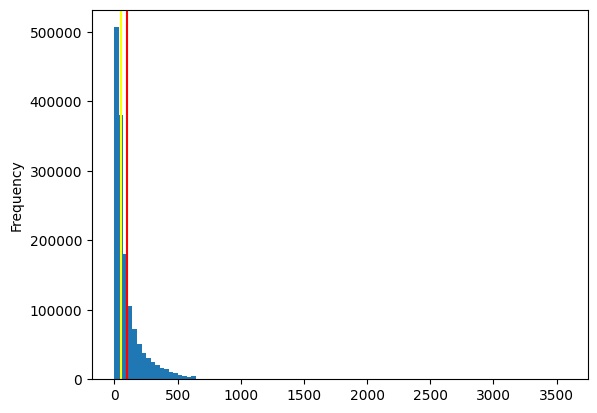

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sizes.plot.hist(bins=100, ax=ax)
ax.axvline(sizes.mean(), color='red')
ax.axvline(sizes.median(), color='yellow')

# 2) Get class inverse freq

In [8]:
import numpy as np

In [9]:
class_counts = train_df['class_name'].value_counts().values
train_df['class_name'].value_counts()

class_name
Person      449258
Car         206659
Truck        62430
Ship         11287
Aircraft      5679
UAV           5296
Name: count, dtype: int64

In [10]:
class_recall = np.array([51, 83, 70, 35, 70, 82])
class_precision = np.array([78, 87, 81, 66, 71, 93])
class_f1 = 2*class_recall*class_precision/(class_recall+class_precision)

In [11]:
classes_df = pd.DataFrame(train_df['class_name'].value_counts())
classes_df['recall'] = class_recall
classes_df['precision'] = class_precision
classes_df['f1'] = class_f1

<Axes: xlabel='class_name'>

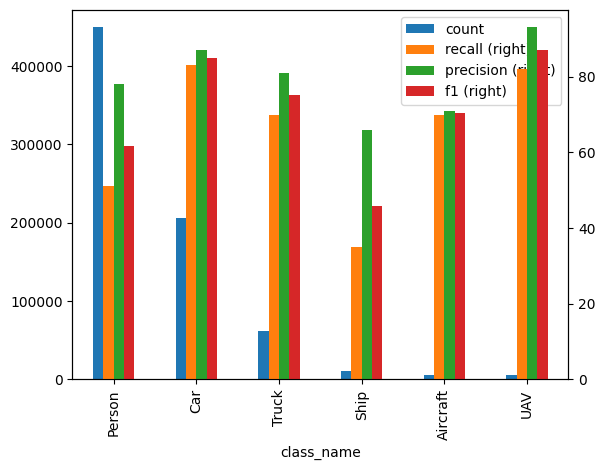

In [12]:
classes_df.plot.bar(secondary_y=('precision', 'recall', 'f1'), legend=1)

### 2.1) N/n_i

In [13]:
num_clases = len(class_counts)
num_samples = sum(class_counts)

c_weights = []
pr_weights = []
pp_weights = []
pf_weights = []
for i in range(num_clases):
    c_weights.append(num_samples/class_counts[i])
    pr_weights.append(class_recall.sum()/class_recall[i])
    pp_weights.append(class_precision.sum()/class_precision[i])
    pf_weights.append(class_f1.sum()/class_f1[i])

In [14]:
c_weights

[1.6485159974891932,
 3.5837248801165202,
 11.863030594265577,
 65.61610702578187,
 130.4118682866702,
 139.84308912386706]

In [15]:
pr_weights

[7.666666666666667,
 4.710843373493976,
 5.585714285714285,
 11.17142857142857,
 5.585714285714285,
 4.7682926829268295]

In [16]:
pp_weights

[6.102564102564102,
 5.471264367816092,
 5.8765432098765435,
 7.212121212121212,
 6.704225352112676,
 5.118279569892473]

In [17]:
pf_weights

[6.8929715272553285,
 5.004182380440435,
 5.660769111259692,
 9.293749167010946,
 6.030374407209864,
 4.877786650624849]

### 2.2) N/(n_i*6)

In [18]:
num_clases = len(class_counts)
num_samples = sum(class_counts)

c_weights = []
pr_weights = []
pp_weights = []
pf_weights = []
for i in range(num_clases):
    c_weights.append(num_samples/(class_counts[i]*num_clases))
    pr_weights.append(class_recall.sum()/(class_recall[i]*num_clases))
    pp_weights.append(class_precision.sum()/(class_precision[i]*num_clases))
    pf_weights.append(class_f1.sum()/(class_f1[i]*num_clases))

In [19]:
c_weights

[0.2747526662481989,
 0.5972874800194201,
 1.9771717657109296,
 10.936017837630311,
 21.7353113811117,
 23.307181520644512]

In [20]:
pr_weights

[1.2777777777777777,
 0.785140562248996,
 0.930952380952381,
 1.861904761904762,
 0.930952380952381,
 0.7947154471544715]

In [21]:
pp_weights

[1.017094017094017,
 0.9118773946360154,
 0.9794238683127572,
 1.202020202020202,
 1.1173708920187793,
 0.8530465949820788]

In [22]:
pf_weights

[1.1488285878758882,
 0.8340303967400724,
 0.9434615185432821,
 1.5489581945018243,
 1.005062401201644,
 0.8129644417708081]

### 2.4) max(n)/n_i

In [23]:
num_clases = len(class_counts)
num_samples = sum(class_counts)

c_weights = []
pr_weights = []
pp_weights = []
pf_weights = []
for i in range(num_clases):
    c_weights.append(max(class_counts)/(class_counts[i]))
    pr_weights.append(class_recall.max()/(class_recall[i]))
    pp_weights.append(class_precision.max()/(class_precision[i]))
    pf_weights.append(class_f1.max()/(class_f1[i]))

In [24]:
c_weights

[1.0,
 2.17390967729448,
 7.196187730257889,
 39.80313635155488,
 79.10864588836063,
 84.82968277945619]

In [25]:
pr_weights

[1.6274509803921569,
 1.0,
 1.1857142857142857,
 2.3714285714285714,
 1.1857142857142857,
 1.0121951219512195]

In [26]:
pp_weights

[1.1923076923076923,
 1.0689655172413792,
 1.1481481481481481,
 1.4090909090909092,
 1.3098591549295775,
 1.0]

In [27]:
pf_weights

[1.4131351001939239,
 1.0259125170633272,
 1.1605200302343162,
 1.9053209647495362,
 1.2362931876976144,
 1.0]

### 2.5) (N-ni)/n_i

In [28]:
num_clases = len(class_counts)
num_samples = sum(class_counts)

c_weights = []
pr_weights = []
pp_weights = []
pf_weights = []
for i in range(num_clases):
    c_weights.append((num_samples-class_counts[i])/(class_counts[i]))
    pr_weights.append((class_recall.sum()-class_recall[i])/(class_recall[i]))
    pp_weights.append((class_precision.sum()-class_precision[i])/(class_precision[i]))
    pf_weights.append((class_f1.sum()-class_f1[i])/(class_f1[i]))

In [29]:
c_weights

[0.6485159974891933,
 2.5837248801165202,
 10.863030594265577,
 64.61610702578187,
 129.4118682866702,
 138.84308912386706]

In [30]:
pr_weights

[6.666666666666667,
 3.710843373493976,
 4.585714285714285,
 10.17142857142857,
 4.585714285714285,
 3.768292682926829]

In [31]:
pp_weights

[5.102564102564102,
 4.471264367816092,
 4.8765432098765435,
 6.212121212121212,
 5.704225352112676,
 4.118279569892473]

In [32]:
pf_weights

[5.8929715272553285,
 4.004182380440435,
 4.660769111259692,
 8.293749167010946,
 5.030374407209864,
 3.877786650624848]

### 2.6) log(2.1)

In [33]:
num_clases = len(class_counts)
num_samples = sum(class_counts)

c_weights = []
pr_weights = []
pp_weights = []
pf_weights = []
for i in range(num_clases):
    c_weights.append(np.log(num_samples/class_counts[i]))
    pr_weights.append(np.log(class_recall.sum()/class_recall[i]))
    pp_weights.append(np.log(class_precision.sum()/class_precision[i]))
    pf_weights.append(np.log(class_f1.sum()/class_f1[i]))

In [34]:
c_weights

[0.49987548775262214,
 1.2764027288058806,
 2.4734268916409596,
 4.183821199741123,
 4.870697659819317,
 4.9405210020799055]

In [35]:
pr_weights

[2.03688192726104,
 1.5498669521887678,
 1.7202123179360067,
 2.413359498495952,
 1.7202123179360067,
 1.5619883127211127]

In [36]:
pp_weights

[1.8087090275418283,
 1.6995097355768363,
 1.7709686995589813,
 1.9757631122049943,
 1.9027379771901045,
 1.6328183610781641]

In [37]:
pf_weights

[1.9305022732197084,
 1.610274038871034,
 1.7335597683650805,
 2.229342041597374,
 1.796809099559448,
 1.584691561777959]

### 2.7) log(2.2)

In [38]:
num_clases = len(class_counts)
num_samples = sum(class_counts)

c_weights = []
pr_weights = []
pp_weights = []
pf_weights = []
for i in range(num_clases):
    c_weights.append(np.log(num_samples/(class_counts[i]*num_clases)))
    pr_weights.append(np.log(class_recall.sum()/(class_recall[i]*num_clases)))
    pp_weights.append(np.log(class_precision.sum()/(class_precision[i]*num_clases)))
    pf_weights.append(np.log(class_f1.sum()/(class_f1[i]*num_clases)))

In [39]:
c_weights

[-1.2918839814754328,
 -0.5153567404221743,
 0.6816674224129046,
 2.392061730513068,
 3.078938190591262,
 3.14876153285185]

In [40]:
pp_weights

[0.016949558313773205,
 -0.09224973365121868,
 -0.02079076966907378,
 0.18400364297693944,
 0.11097850796204951,
 -0.158941108149891]

In [41]:
pr_weights

[0.2451224580329849,
 -0.24189251703928716,
 -0.0715471512920482,
 0.6216000292678971,
 -0.0715471512920482,
 -0.22977115650694238]

In [42]:
pf_weights

[0.13874280399165342,
 -0.18148543035702108,
 -0.0581997008629745,
 0.4375825723693191,
 0.00504963033139288,
 -0.2070679074500962]

### 2.8) log(2.4)

In [43]:
num_clases = len(class_counts)
num_samples = sum(class_counts)

c_weights = []
pr_weights = []
pp_weights = []
pf_weights = []
for i in range(num_clases):
    c_weights.append(np.log(max(class_counts)/(class_counts[i])))
    pr_weights.append(np.log(class_recall.max()/(class_recall[i])))
    pp_weights.append(np.log(class_precision.max()/(class_precision[i])))
    pf_weights.append(np.log(class_f1.max()/(class_f1[i])))

In [44]:
c_weights

[0.0,
 0.7765272410532584,
 1.9735514038883373,
 3.6839457119885006,
 4.370822172066695,
 4.440645514327283]

In [45]:
pp_weights

[0.1758906664636642,
 0.06669137449867214,
 0.13815033848081718,
 0.3429447511268304,
 0.26991961611194054,
 0.0]

In [46]:
pf_weights

[0.3458107114417497,
 0.02558247709307512,
 0.14886820658712174,
 0.6446504798194153,
 0.212117537781489,
 0.0]

In [47]:
pr_weights

[0.48701497507227215,
 0.0,
 0.17034536574723894,
 0.8634925463071842,
 0.17034536574723894,
 0.01212136053234482]

### 2.9) log(2.5)

In [48]:
num_clases = len(class_counts)
num_samples = sum(class_counts)

c_weights = []
pr_weights = []
pp_weights = []
pf_weights = []
for i in range(num_clases):
    c_weights.append(np.log((num_samples-class_counts[i])/(class_counts[i])))
    pr_weights.append(np.log((class_recall.sum()-class_recall[i])/(class_recall[i])))
    pp_weights.append(np.log((class_precision.sum()-class_precision[i])/(class_precision[i])))
    pf_weights.append(np.log((class_f1.sum()-class_f1[i])/(class_f1[i])))

In [49]:
c_weights

[-0.43306860708087375,
 0.9492321097088224,
 2.3853653358211706,
 4.168463714474235,
 4.863000095686868,
 4.933344440269743]

In [50]:
pp_weights

[1.629743178594846,
 1.4976712249638626,
 1.584436610228683,
 1.826502417671928,
 1.7412071900652237,
 1.41543549602739]

In [51]:
pr_weights

[1.8971199848858813,
 1.3112591751769764,
 1.5229458810806569,
 2.319582669362617,
 1.5229458810806569,
 1.3266220296334923]

In [52]:
pf_weights

[1.7737603742227446,
 1.3873394099761727,
 1.5391804798537696,
 2.115502118662619,
 1.6154944161744882,
 1.355264539996296]

### P as multiplicative factor

In [53]:
def standardize(X):
    return (X - np.mean(X))/np.std(X) + 2

In [54]:
standardize(class_f1)

array([1.35026963, 2.99804177, 2.30055364, 0.22253271, 1.97473813,
       3.15386413])

In [55]:
standardize(class_precision)

array([1.85354959, 2.84208983, 2.18306301, 0.53549595, 1.08468497,
       3.50111665])

In [56]:
standardize(class_recall)

array([1.17257058, 3.04158762, 2.28229945, 0.23806207, 2.28229945,
       2.98318084])

In [57]:
standardize(class_counts)

array([4.01288498, 2.51414599, 1.6231216 , 1.30716808, 1.27252273,
       1.27015661])

In [58]:
def invert_array(arr):
    # Create a list of tuples containing values and their indices
    indexed_arr = [(value, idx) for idx, value in enumerate(arr)]
    # Sort the list based on values
    indexed_arr.sort(key=lambda x: x[0])
    # Extract the indices from the sorted list
    inverted_indices = [x[1] for x in indexed_arr]
    # Use the inverted indices to reorder the original array
    inverted_arr = [arr[idx] for idx in inverted_indices]
    return inverted_arr

In [59]:
invert_array(standardize(class_counts))

[1.2701566130539006,
 1.272522727643941,
 1.3071680817456297,
 1.6231216025770614,
 2.5141459921513247,
 4.012884982828142]

In [60]:
invert_array(standardize(class_precision))

[0.5354959481235757,
 1.084684967577235,
 1.8535495948123581,
 2.1830630064845535,
 2.8420898298289448,
 3.501116653173336]

In [68]:
weights = [100 / p for p in class_f1]
mean_reciprocal = np.mean(weights)
weights/mean_reciprocal

array([1.09528633, 0.79515961, 0.89949059, 1.47676751, 0.9582205 ,
       0.77507545])